## Assignment #1 DATA 730

This assignment tests that you have the course tech stack set up. If you do, you will be able to complete this notebook and turn-in your work by pushing to your assignment repository.

## Tech stack checklist

*Fill out the checklist below once you have completed each task:*

- [X] GitHub account
- [X] SageMaker Studio Lab account 
    I've been put on a waitlist for sagemaker.
- [X] [GitHub personal access token](https://docs.github.com/en/authentication/keeping-our-account-and-data-secure/managing-your-personal-access-tokens#creating-a-personal-access-token-classic) (for authenticating with GitHub)

**Create the `data730` conda environment by right clicking the `environment.yml` file from the repo in SageMaker Studio Lab and selecting `Build conda Environment`.** 

In [5]:
# uncomment the following line and execute this cell to demonstrate you have created the data730 conda environment
system('conda env list | grep data_730_unit_1', intern = TRUE)

# I named it data_730_unit_1. The error is likely due to me running this in VS Code and some setting configuration instead of sagemaker
# at the time of doing this I'm on a sagemaker waitlist.

Warning message in system("conda env list | grep data_730_unit_1", intern = TRUE):
"running command 'conda env list | grep data_730_unit_1' had status 2"


character(0)
attr(,"status")
[1] 2

In [3]:
# uncomment the following line and execute this cell to demonstrate that you have installed the tidymodels package
library('tidymodels')

-- Attaching packages -------------------------------------- tidymodels 1.1.0 --

v broom        1.0.5     v recipes      1.0.6
v dials        1.2.0     v rsample      1.1.1
v dplyr        1.1.4     v tibble       3.2.1
v ggplot2      3.4.2     v tidyr        1.3.1
v infer        1.0.4     v tune         1.1.1
v modeldata    1.1.0     v workflows    1.1.3
v parsnip      1.1.0     v workflowsets 1.0.1
v purrr        1.0.2     v yardstick    1.3.1

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x purrr::discard() masks scales::discard()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x recipes::step()  masks stats::step()
* Learn how to get started at https://www.tidymodels.org/start/



## Let's do some statistical inference!

Read [this article](https://www.theguardian.com/world/2002/jan/04/euro.eu2). 

Execute the code below to investigate whether the coin is fair...

In [4]:
# These functions simulate tossing a fair coin n_tosses number of times for n_iterations number of iterations

toss_fair_coin_n_times = function(n_tosses = 250) {
    result = ifelse(runif(n = n_tosses) < 0.5, 'heads', 'tails')
    result
}

repeat_the_experiment = function(n_iterations, n_tosses = 250) {
    n_heads_each_iteration = c()
    for (i in 1:n_iterations) {
        n_heads = sum(toss_fair_coin_n_times(n_tosses) == 'heads')
        n_heads_each_iteration = c(n_heads_each_iteration, n_heads)
    } 
    n_heads_each_iteration
}

In [5]:
# Let's do 10,000 experiments of 250 tosses and see how often our outcome deviates from what was actually observed (139 heads)

n_iterations = 10000
n_tosses = 250
observed_deviation = 139 - 125 # 139 heads observed, expected value for a fair coin of 125

n_heads_each_experiment = repeat_the_experiment(n_iterations, n_tosses)

x = mean(abs(n_heads_each_experiment - 125) >= observed_deviation)
paste0('With a fair coin we would expect a deviation as large or larger than what we observed ', x*100, '% of times')

[1] "With a fair coin we would expect a deviation as large or larger than what we observed 8.26% of times"

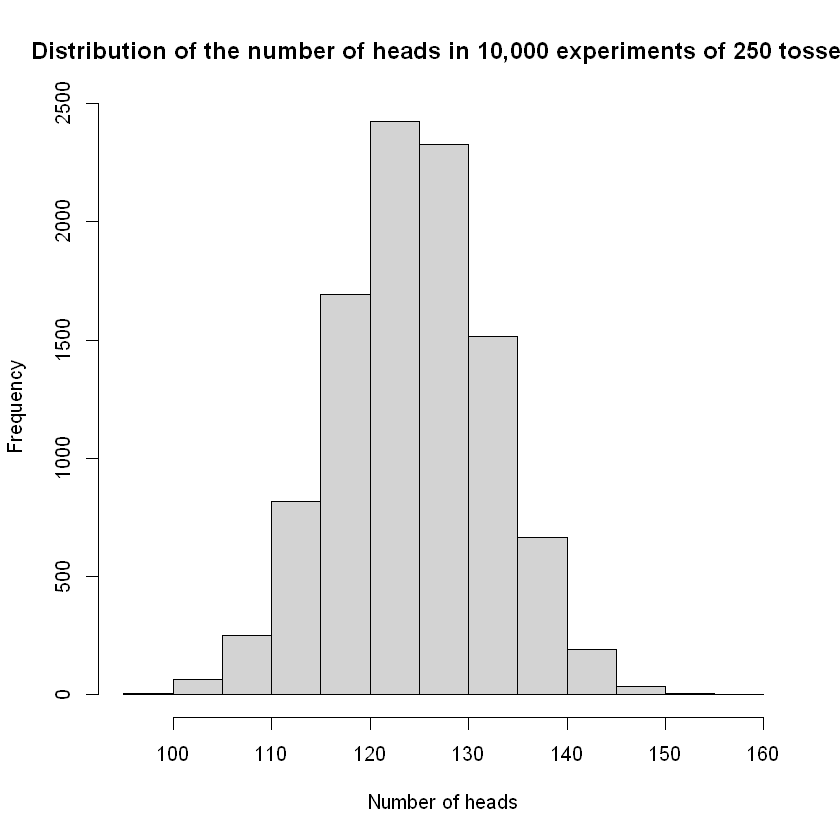

In [7]:
# print the plot of the distribution of the number of heads
hist(n_heads_each_experiment, breaks = 20, main = 'Distribution of the number of heads in 10,000 experiments of 250 tosses', xlab = 'Number of heads', ylab = 'Frequency')


**Do you think the coin was fair?** (Answer below in a markdown cell.)

In [8]:
# I think that the observed deviation is in line with the law of large numbers and a fair coin. 
# with an additional plot, you can see a very normal distribution over the iterations on a simulated event.